In [10]:
!pip install response

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 3.1 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
import requests
import http.client
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Use double quotes to assign your API key to private_api_key variable as a string
private_api_key = "ddfde50cd1mshe28434f212e78bap142fa2jsn0423e3ebd2b4"

Each api call allows only to extract the date from one day from euro to multiple coins.
The following chunk of code will allow a for loop that takes each of the dates and saves the information on a data frame.

In [71]:
# Set the connection to the api
conn = http.client.HTTPSConnection("currency-conversion-and-exchange-rates.p.rapidapi.com")

# Set the header required for each API call
headers = {
    'x-rapidapi-key': "ddfde50cd1mshe28434f212e78bap142fa2jsn0423e3ebd2b4",
    'x-rapidapi-host': "currency-conversion-and-exchange-rates.p.rapidapi.com"
}

# Set a list of all of the dates that we want to check
l_dates = ["2024-07-24", "2024-07-25", "2024-07-26", "2024-07-27", "2024-07-28", "2024-07-29", "2024-07-30", "2024-07-31", "2024-08-01", "2024-08-02", "2024-08-03", "2024-08-04", "2024-08-05", "2024-08-06", "2024-08-07", "2024-08-08", "2024-08-09", "2024-08-10", "2024-08-11", "2024-08-12", "2024-08-13", "2024-08-14", "2024-08-15", "2024-08-16", "2024-08-17", "2024-08-18", "2024-08-19", "2024-08-20", "2024-08-21", "2024-08-22", "2024-08-23", "2024-08-24", "2024-08-25", "2024-08-26", "2024-08-27", "2024-08-28", "2024-08-29", "2024-08-30", "2024-08-31", "2024-09-01", "2024-09-02", "2024-09-03", "2024-09-04", "2024-09-05", "2024-09-06", "2024-09-07", "2024-09-08", "2024-09-09", "2024-09-10", "2024-09-11", "2024-09-12", "2024-09-13", "2024-09-14", "2024-09-15", "2024-09-16", "2024-09-17", "2024-09-18", "2024-09-19", "2024-09-20", "2024-09-21", "2024-09-22", "2024-09-23", "2024-09-24", "2024-09-25", "2024-09-26", "2024-09-27", "2024-09-28", "2024-09-29", "2024-09-30", "2024-10-01", "2024-10-02", "2024-10-03", "2024-10-04", "2024-10-05", "2024-10-06", "2024-10-07", "2024-10-08", "2024-10-09", "2024-10-10", "2024-10-11", "2024-10-12", "2024-10-13", "2024-10-14", "2024-10-15", "2024-10-16", "2024-10-17", "2024-10-18", "2024-10-19", "2024-10-20", "2024-10-21"]
df_full = pd.DataFrame()
for date_to_get in l_dates:
    conn.request("GET", "/"+date_to_get+"?from=EUR&to=COP%2CBRL", headers=headers)

    res = conn.getresponse()
    data = res.read()

    print(data.decode("utf-8"))
    dict_resp = json.loads(data.decode("utf-8"))
    exchange_rates = pd.DataFrame.from_dict(dict_resp)
    exchange_rates.reset_index(inplace=True)

    df_full = pd.concat([exchange_rates, df_full])

{"timestamp":1721865599,"base":"EUR","success":true,"rates":{"ANG":1.953921,"SVC":9.486133,"CAD":1.496984,"XCD":2.929323,"MVR":16.637792,"HRK":7.487603,"AUD":1.648609,"MWK":1881.139462,"XAG":0.037509,"MAD":10.729097,"PHP":63.497131,"NAD":19.889689,"GNF":9335.183272,"KES":144.159902,"MZN":69.261901,"BTN":90.752408,"MGA":4918.24963,"AZN":1.846275,"XAU":0.000452,"RON":4.970163,"CHF":0.959321,"EGP":52.391487,"BSD":1.084201,"TWD":35.476189,"GGP":0.835219,"LVL":0.655647,"MMK":3520.500542,"WST":3.038862,"ILS":3.955966,"BHD":0.408523,"GBP":0.840281,"TZS":2926.559475,"SDG":635.17136,"LAK":24042.229294,"DJF":192.632573,"BYN":3.548076,"LBP":97118.423082,"RWF":1425.342922,"PEN":4.073012,"EUR":1,"ZMK":9756.496712,"RSD":117.064569,"INR":90.770227,"MUR":50.650878,"BWP":14.710656,"GEL":2.953702,"KMF":492.339483,"UZS":13651.858749,"RUB":93.477634,"CUC":1.083911,"BGN":1.955657,"JOD":0.768169,"NGN":1717.186388,"BDT":127.388361,"PKR":301.871331,"BRL":6.129628,"KZT":513.853051,"CVE":110.699227,"HNL":26.864

In [3]:
df_full

NameError: name 'df_full' is not defined

In [73]:
# Export to CSV to guarantee the acces to the information later on
df_full.to_csv("currency_exch_gen_dates.csv")

In order to not overcharge the free API usage we run two times the values. in diferent date lines and concatenate them.

In [4]:
# Read CSV
df_full = pd.read_csv("currency_exch_gen.csv")

In [5]:
# As we reset the indexes we require the name of the column to represent the "representative market rate"
df_full.rename(columns={"index":"currency_abreviation"}, inplace=True)

In [6]:
# Select the coin tag that corresponds to the country that we require
df_country = df_full[df_full["currency_abreviation"] == 'COP']

In [7]:
# Reset the indexes and deleting the old index
df_country.reset_index(drop=True, inplace=True)

In [8]:
df_country.head()

,Unnamed: 0,currency_abreviation,timestamp,base,success,rates,date,historical
0,96,COP,1729555199,EUR,True,4627.082792,2024-10-21,True
1,96,COP,1729468799,EUR,True,4605.459678,2024-10-20,True
2,96,COP,1729382399,EUR,True,4608.344219,2024-10-19,True
3,96,COP,1729295999,EUR,True,4640.583907,2024-10-18,True
4,96,COP,1729209599,EUR,True,4605.334617,2024-10-17,True


In [9]:
# find the type of data on each column.
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            90 non-null     int64  
 1   currency_abreviation  90 non-null     object 
 2   timestamp             90 non-null     int64  
 3   base                  90 non-null     object 
 4   success               90 non-null     bool   
 5   rates                 90 non-null     float64
 6   date                  90 non-null     object 
 7   historical            90 non-null     bool   
dtypes: bool(2), float64(1), int64(2), object(3)
memory usage: 4.5+ KB


In [10]:
# Change date from object to date
df_country['date'] = pd.to_datetime(df_country['date'])

/var/folders/f_/hf8316d132j76nwh8g854fmm0000gn/T/ipykernel_22108/410872753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['date'] = pd.to_datetime(df_country['date'])


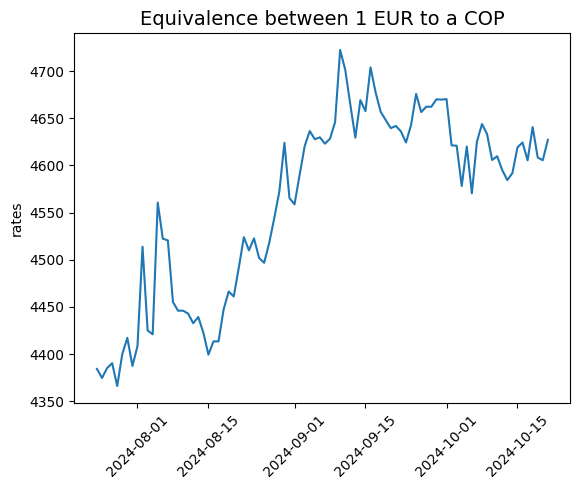

In [12]:
# Creating the line plot
sns.lineplot(x='date', y='rates', data=df_country)
plt.xlabel('')
plt.xticks(rotation=45)
plt.title("Equivalence between 1 EUR to a COP", fontsize = 14)
plt.show()

We expect our boutique coffe production will be arround 10000 lb of coffee per month
We allso expect the median price to be our reference price. Based on the previous information we obtain

In [16]:
df_country.head()

,Unnamed: 0,currency_abreviation,timestamp,base,success,rates,date,historical
0,96,COP,1729555199,EUR,True,4627.082792,2024-10-21,True
1,96,COP,1729468799,EUR,True,4605.459678,2024-10-20,True
2,96,COP,1729382399,EUR,True,4608.344219,2024-10-19,True
3,96,COP,1729295999,EUR,True,4640.583907,2024-10-18,True
4,96,COP,1729209599,EUR,True,4605.334617,2024-10-17,True


In [25]:
df_country['month'] = df_country['date'].dt.month

# Group by the 'month' and calculate the mean of the 'rates' column
df_country_monthly_mean = df_country.groupby('month')['rates'].mean().reset_index()

# Rename the columns
df_country_monthly_mean.columns = ['month', 'mean_rate_exchange_COP']

/var/folders/f_/hf8316d132j76nwh8g854fmm0000gn/T/ipykernel_22108/1152129673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['month'] = df_country['date'].dt.month


In [26]:
df_country_monthly_mean

,month,mean_rate_exchange_COP
0,7,4388.093795
1,8,4481.501518
2,9,4649.043383
3,10,4614.280424


In [35]:
df_country_monthly_mean['price_per_lb_EUR'] = 0.60

In [40]:
df_country_monthly_mean['number_of_lb_produced_by_month'] = 10000

In [41]:
df_country_monthly_mean['gross_revenue'] = df_country_monthly_mean["number_of_lb_produced_by_month"] * df_country_monthly_mean["price_per_lb_EUR"] * df_country_monthly_mean["mean_rate_exchange_COP"]

In [42]:
df_country_monthly_mean["gross_revenue"] = df_country_monthly_mean["gross_revenue"].apply(lambda x: '{:.0f}'.format(x))

In [48]:
df_country_monthly_mean["gross_revenue"] = df_country_monthly_mean["gross_revenue"].astype(float)

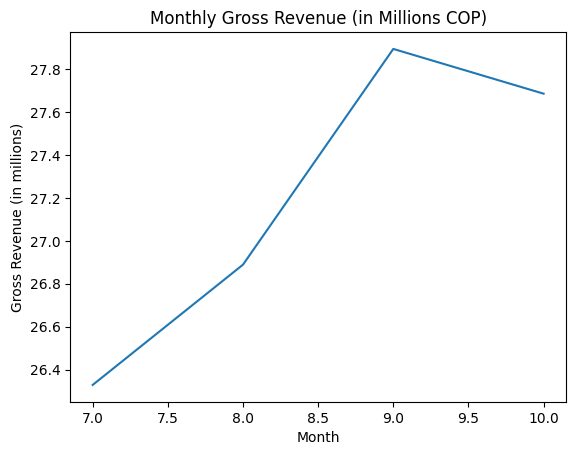

In [51]:
df_country_monthly_mean['gross_revenue_millions'] = df_country_monthly_mean['gross_revenue'] / 1_000_000

# Plotting the data with Seaborn
sns.lineplot(x='month', y='gross_revenue_millions', data=df_country_monthly_mean)

# Labeling the axes
plt.xlabel('Month')
plt.ylabel('Gross Revenue (in millions)')
plt.title('Monthly Gross Revenue (in Millions COP)')

# Show the plot
plt.show()